In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [24]:
#Task 1: Data Preparation
#Step 1.1 :Importing the csv
my_data_automobile = pd.read_csv('Automobile.csv', sep="#",decimal='.',header=None,names=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
                                                                          'engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size',
                                                                         'fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'],encoding="utf-8")

In [25]:
#displaying the tables
my_data_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [26]:
#Summary about the data set(my_data_automobile)
my_data_automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,238.000000,191.000000,238.00000,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,234.000000,238.000000,236.000000,236.000000,238.000000,238.000000,234.000000
mean,0.642857,116.863874,100.15042,176.094538,66.306303,53.987815,2628.159664,129.575630,3.361282,3.243120,10.458908,107.152542,5140.889831,24.638655,30.016807,13696.081197
std,1.360446,36.171118,6.59659,12.534385,2.230344,2.366944,517.099334,39.453019,0.290631,0.301348,4.384463,38.288297,456.806273,6.357468,6.681397,8060.776465
min,-2.000000,25.000000,86.60000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,0.000000
25%,0.000000,94.000000,95.15000,168.700000,64.400000,52.000000,2224.750000,98.000000,3.150000,3.112500,8.700000,75.250000,4800.000000,19.000000,25.000000,7823.000000
50%,0.000000,104.000000,98.40000,175.500000,66.050000,54.400000,2548.000000,122.000000,3.350000,3.270000,9.000000,102.000000,5200.000000,24.000000,29.000000,11253.500000
75%,2.000000,145.000000,105.57500,188.800000,68.400000,55.500000,3049.000000,145.000000,3.620000,3.400000,9.500000,121.000000,5500.000000,28.750000,34.000000,17890.000000
max,4.000000,256.000000,120.90000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [27]:
#Step 1.2 :Remove white spaces in all columns
def remove_whitespace(x):
    if isinstance(x, basestring):
        return x.strip()
    else:
        return x
my_data_automobile = my_data_automobile.applymap(remove_whitespace)

In [28]:
#Convert all the column values into lower cases
def remove_letter(x):
    if isinstance(x, basestring):
        return x.lower()
    else:
        return x
my_data_automobile = my_data_automobile.applymap(remove_letter)

In [29]:
#Step 1.3 & 1.4 Typo errors and sanity checks for impossible values
my_data_automobile['symboling'] = my_data_automobile['symboling'].replace(4,3)

In [30]:
#Typo errors are handled with replace function.
my_data_automobile['make'] = my_data_automobile['make'].str.replace('vol00112ov','volvo')
my_data_automobile['aspiration'] = my_data_automobile['aspiration'].str.replace('turrrrbo','turbo')
my_data_automobile['num-of-doors'] = my_data_automobile['num-of-doors'].str.replace('fourr', 'four')

In [31]:
#Step 1.5 : Checking Missing Values
my_data_automobile.isnull().sum()

symboling             0
normalized-losses    47
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [32]:
#Checking volvo_price 
volvo_price = my_data_automobile[(my_data_automobile['make'] == 'volvo') & (my_data_automobile['price'] > 0)] 

In [33]:
#taking mean for volvo price alone
volvo_price = volvo_price['price'].mean()

In [34]:
#replace the volvo price in dataset
my_data_automobile.replace({'price': {0: volvo_price}}, inplace = True)

In [35]:
#fill the na values with mean
my_data_automobile = my_data_automobile.fillna(my_data_automobile.mean(axis = 0))

In [36]:
#checking for missing values
my_data_automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [37]:
#Dropping the entire row with drop_na function
my_data_automobile.dropna(subset = ['num-of-doors'], how = 'all', inplace = True)

In [38]:
#Checking for null values
my_data_automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

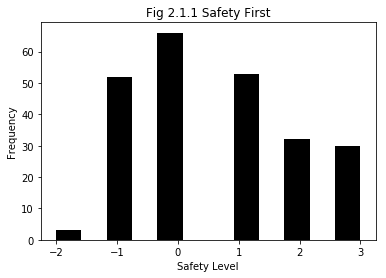

In [51]:
#Task 2 
#Step 2.1.1 Creating histogram for oridinal value
plt.hist(my_data_automobile['symboling'], bins=12 ,facecolor='black')
plt.xlabel("Safety Level")
plt.ylabel("Frequency")
plt.title("Fig 2.1.1 Safety First")
plt.show()

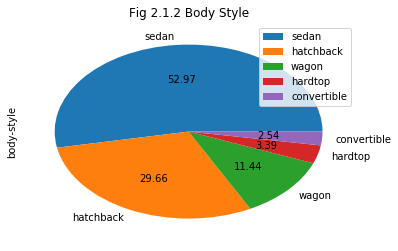

In [42]:
##Step 2.1.2 Creating Pie Chart for Nominal Value
my_data_automobile['body-style'].value_counts().plot(kind='pie', legend=True,title="Fig 2.1.2 Body Style",autopct='%.2f')

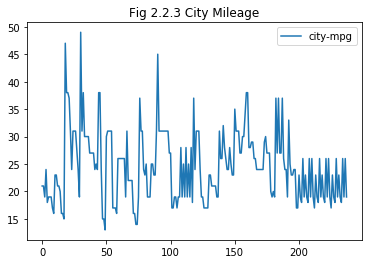

In [43]:
#Step 2.1.3 Creating Line grah for numeric value
my_data_automobile['city-mpg'].plot.line(x='city-mpg',title="Fig 2.2.3 City Mileage",legend='true')

Text(0.5,1,'Fig 2.2.1 Horsepower - highway mileage')


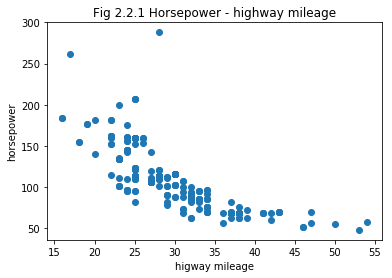

In [52]:
#Step 2.2.1 Creating Scatter Plot for Horsepower - highway mileage
plt.scatter(my_data_automobile['highway-mpg'],my_data_automobile['horsepower'])
plt.xlabel('higway mileage')
plt.ylabel('horsepower')
print(plt.title('Fig 2.2.1 Horsepower - highway mileage'))

Text(0.5,1,'Fig 2.2.2 Relation between Make and Price')

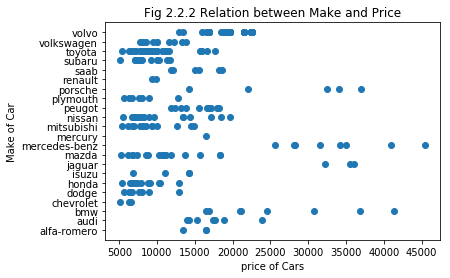

In [46]:
#Step 2.2.2 Creating Scatter Plot for Make - Price
plt.scatter(my_data_automobile['price'],my_data_automobile['make'])
plt.xlabel('price of Cars')
plt.ylabel('Make of Car')
plt.title("Fig 2.2.2 Relation between Make and Price")

Text(0.5,1,'Fig 2.2.3 city-mpg - num-of-cylinders')

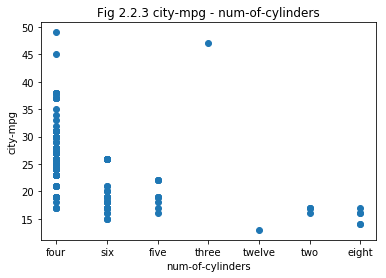

In [49]:
#Step 2.2.3 Creating Scatter Plot for City-mpg -  number of cylinders
plt.scatter(my_data_automobile['num-of-cylinders'],my_data_automobile['city-mpg'])
plt.xlabel('num-of-cylinders')
plt.ylabel('city-mpg')
plt.title('Fig 2.2.3 city-mpg - num-of-cylinders')

In [ ]:
#Step 2.3 Creating a Scatter Plot for the
from pandas.tools.plotting import scatter_matrix
scat_mat = my_data_automobile[['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight','engine-size','bore', 'stroke', 'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']]
scatter_matrix(scat_mat, figsize=(18, 18))
plt.show()